# Logistic Regression:

In the previous code we implemented linear regression. is the hammer we reach for when we want to answer how much? or how many? questions. If we want to predict the number of dollars (the price) at which a house will be sold, or the number of wins a baseball team might have, or the number of days that a patient will remain hospitalized before being discharged, then we're probably looking for a regression model.

However, in industry, we are more often interested in making categorical assignments. Does this email belong to the spam folder? How likely is this customer to sign up for subscription service? When we're interested in either assigning datapoints to categories or assessing the probability that a category applies, we call this task classification.

The simplest kind of classification problem is the binary classification, when there are only two categories, so let's start here. Let's call our two categories the positive class $y_i = 1$ and the negative class $y_i = 0$. Even with just two categories, and even confining ourselves to linear models. Even with just 2 categories, and even confining ourselves to linear models, there are many ways we might approach the problem. For example, we might try to draw a line that best separates the points.

A whole family of algorithms called support vector machines pursue this approach. The main idea here is choose a line that maximizes the margin to the closest data points on either side of the decision boundary (the support vectors) actually influence the choice of the line separator.

With neural networks, we actually approach the problem differently. Instead of just trying to separate the points, we train a probabilistic classifier which estimates, for each data point, the conditional probability that it belongs to the positive class.

Recall that in linear regression, we made predictions of the form:
        $$\bar y = x\cdot w + b$$
        
We are interested in asking the question "what is the probability that example 'x' belongs to the positive class?" A regular linear model is a poor choice here because it can output values greater than 1 and less than  0. To coerce reasonable answers from our model, we are going to modify it slightly, by running the linear function through sigmoid activation function:
        $$\bar y = \sigma (w^T \cdot x + b),$$
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;where $w^T$ is the transpose of weight matrix
        
The sigmoid function, sometimes called a squashing function or a logistic function - thus the name logistic regression - maps a real-valued input to the range 0 to 1. Specifically, it has the functional form:
        $$\sigma (z) = \frac{1}{1+e^{-z}}$$

In [2]:
#lets import the relevant libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#defining a function to draw the regression line to see how well the model classifies our data
def draw(x1, x2):
    line = plt.plot(x1, x2, color = 'g')

In [4]:
#defining the sigmoid function
def sigmoid(score):
    return 1/(1+np.exp(-score))

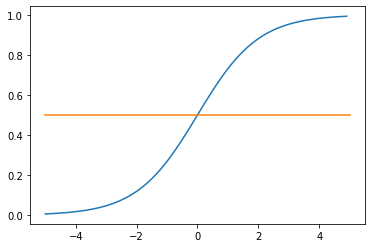

In [5]:
#plotting the sigmoid function
x = np.arange(-5, 5, 0.1)
p = sigmoid(x)

plt.plot(x, p)
plt.plot([-5, 5], [0.5, 0.5])
plt.show()

As can be seen from the plot, that sigmoid outputs a value between 0 and 1, it is more reasonable to think of it as a probability. Note that the input of 0 gives a value of 0.5. So in common case, where we want to predict positive whenever the probability is greater than 0.5 and negative whenever the probability is less than 0.5, we can just look at the sign of $(w^T \cdot x + b)$.

### Binary Cross Entropy Loss:

Now that we have a model which outputs probabilities, we need to choose a loss function. When we wanted to predict how much, we used sqaured error $(\bar y - y)^2$, as the measure of our model's performance.

Since now we are thinking about outputting probabilities, one natural objective is to say that we should choose the weights that give the actual labels in the training data the highest probability.
        $$
        \max_{\theta}(P_{\theta}((y_1,\dots, y_n)|x_1,\dots, x_n))
        $$

Because each example is independent of the others, and each label depends only on the features of the corresponding examples, we can rewrite the above as:
        $$
        \max_{\theta} P_{\theta}(y_1|x_1)P_{\theta}(y_2|x_2) \dots P_{\theta}(y_n|x_n)
        $$
        
This function is a product over the examples, but in general, because we want to train by stochastic gradient descent, it's a lot easier to work with a loss function that breaks down as a sum over the training examples:
        $$
        \max_{\theta} \log P_{\theta}(y_1|x_1) + \dots + \log P_{\theta}(y_n|x_n)
        $$
        
Because we typically represent our objective as a loss we can just flip sign, giving us the negative log probability:
        $$
        \min_{\theta}(- \sum_{i=1}^n (\log P_{\theta}(y_i|x_i)))
        $$
        
If we interpret $\bar y_i$ as the probability that the i-th example belongs to the positive class (i.e. $y_i = 1$), then
$1 - \bar y_i$ is the probabiltiy that the i-th example belongs to the negative class (i.e. $y_i = 0$). This is equivalent to saying:<br>
        $$P_{\theta}(y_i|x_i) = 
                                \begin{cases}
                                    \bar y_i & \mbox{if } y_i = 1 \\
                                    (1 - \bar y_i) & \mbox{if } y_i = 0
                                \end{cases}
                                $$

Another way of writing this in a more compact form:
        $$P_{\theta}(y_i|x_i) = \bar y_i^{y_i} (1 - \bar y_i)^{(1-y_i)}$$
        
Thus we can express our loss function as:
        $$l(y, \bar y_i) = - \sum_{i=1}^n(y_i \log \bar y_i + (1-y_i) \log (1- \bar y_i))$$
        
This might have been too much information too quickly. Let's take a look at this loss function and break down what's going on more slowly. The loss function consists of two terms, $y_i \log \bar y_i$ and $(1-y_i) \log (1- \bar y_i)$. Now, $y_i$ can only take values 0 or 1. When $y_i$ is 1 then the function is equivalent to $\log \bar y_i$, and if $y_i$ is greater than 0.5 and close to 1 then the logarithm value will be low. However, when $\bar y_i$ is close to 0 and $y_i$ is 1, then the logarithmic value will be high. We can have a similar analogy for the second term. When $y_i$ is 0 and $\bar y_i$ is also 0, then the value of the logarithmic term, $\log (1 - \bar y_i)$ will be close to 0. On the other hand, when $y_i$ is 0 and $ \bar y_i$ is 1 then the value of the logarithmic term is high.

This will become more evident when we look at the graph of the cross-entropy loss function.

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


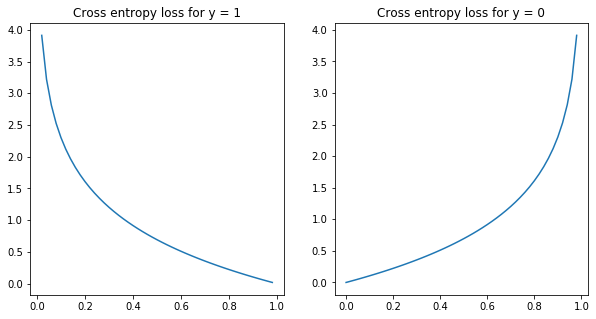

In [6]:
#defining the cross-entropy function when y=1
points = np.arange(0, 1, 0.02)

fig, (ax1, ax2) = plt.subplots(1,2, figsize = (10,5))
ax1.set_title('Cross entropy loss for y = 1')
ax1.plot(points, -np.log(points))
ax2.set_title('Cross entropy loss for y = 0')
ax2.plot(points, -np.log(1-points))

The key thing to note is that the cost function penalizes confident and wrong predictions more than it rewards confident
and right predictions. The corollary is increasing prediction accuracy (closer to 0 or 1) has deminishing returns on reducing
cost due to the logistic nature of our cost function.

In [135]:
'''
Defining the function to calculate the loss of the output during the training process
points: set of randomly generated data points with shape (200, 3), which will be generated further
line_parameters: matrix containing weights and bias values with shape (3,1)
y: actual data labels which the model has to predict correctly with shape (100, 1)
'''

def calculate_error(line_parameters, points, y):
    m = points.shape[0]
    p = sigmoid(np.dot(points, line_parameters))
    cross_entropy = -1/m*(np.log(p).T@y + np.log(1-p).T@(1-y))
    return cross_entropy

## Gradient Descent:

To minimize the cost, we use Gradient Descent, just like before in linear regression. We won't be using stochastic gradient descent as the the dataset that we will be generating will contain 200 points only. Again, we will be training the model using two approahes:
1. We will be coding gradient descent for logistic regression from scratch.
2. We will be using MXNet's built in utility function autograd() so we don't have to worry about the partial derivatives.

#### 1. Gradient descent from scratch:

As we know we will be calculating $\sigma (x \cdot w + b)$, we will introduce an intermediary term:
        $$z = wx+b$$

Also we will denote sigmoid of $z$ by $S(z)$.
So the cost function can be written as:
        $$l = \frac{-1}{m}(y \log S(z) + (1-y)\log (1 - S(z)))$$

Now lets calculate the partial derivates -
$$
S(z) = \frac{1}{1 + e^{-z}}
$$


$$
    \implies \frac{\partial {S(z)}}{\partial z} = \frac{-(-e^{-z})}{(1+e^{-z})^2}
$$


$$
    \implies \frac{\partial {S(z)}}{\partial z} = \frac {1}{1+e^{-z}} \times (1 - \frac {1}{1+e^{-z}})
$$

$$
\implies S'(z) = S(z)(1-S(z)) \;\;\;\;\;\;\;\;\;\dots (eqn \;1)
$$

Now,
$$
\frac {\partial l}{\partial w} = \frac{\partial l}{\partial z} \times \frac{\partial z}{\partial w}
$$

$$
\implies \frac {\partial l}{\partial w}= - \frac{1}{m}(\frac{y}{S(z)}S'(z) + \frac{(1-y)}{(1-S(z))}S'(z)) \times x
$$

Substituting the value of $S'(z)$ from eqn 1, we get:
$$
\frac {\partial l}{\partial w} = -\frac{1}{m}(y(1-S(z)) + (1-y)S(z)) \times x
$$

$$
\implies \frac {\partial l}{\partial w} = -\frac{1}{m}(y - S(z)) \times x
$$

In [136]:
'''
code for gradient descent
line_parameters: matrix containing shapes and bias values with shape (3, 1)
points: set of randomly generated data points with shape (200, 3), which will be generated further
y: actual data labels which the model has to predict correctly with shape (100, 1)
'''
def gradient_descent(line_parameters, points, y, lr):
    m = points.shape[0]
    losses = []
    for i in range(2000):
        p = sigmoid(points@line_parameters)
        gradient = (lr/m)*(points.T @ (p - y))
        loss = calculate_error(line_parameters, all_points, y)
        line_parameters[:] = line_parameters - gradient
        losses.append(list(loss.reshape(1)))
        if (i+1)%200 == 0:
            print("Epoch: %s Loss: %s"%(i+1, loss))
    return losses

In [137]:
#generating the dataset
n_pts = 100

#setting the seed 
np.random.seed(0)
bias = np.ones(n_pts)

#we will be adding the column of ones for bias multiplication
top_region = np.array([np.random.normal(10, 2, n_pts), np.random.normal(12, 2, n_pts), bias]).T
bottom_region = np.array([np.random.normal(5, 2, n_pts), np.random.normal(6, 2, n_pts), bias]).T

all_points = np.vstack((top_region, bottom_region))

In [138]:
#declaring the labels
y = np.array([np.zeros(n_pts), np.ones(n_pts)]).reshape(n_pts*2, 1)

In [139]:
#declaring the line_parameters, basically matrix containing the weigts and biases
line_parameters = np.array([np.zeros(3)]).T

In [140]:
#training the model: the function returns a list of losses and the line parameters
losses = gradient_descent(line_parameters, all_points, y , 0.06)

Epoch: 200 Loss: [[0.43057055]]
Epoch: 400 Loss: [[0.32818699]]
Epoch: 600 Loss: [[0.26959591]]
Epoch: 800 Loss: [[0.23204184]]
Epoch: 1000 Loss: [[0.20593157]]
Epoch: 1200 Loss: [[0.18668369]]
Epoch: 1400 Loss: [[0.17186614]]
Epoch: 1600 Loss: [[0.16007542]]
Epoch: 1800 Loss: [[0.15044651]]
Epoch: 2000 Loss: [[0.14241747]]


Text(0, 0.5, 'Loss')

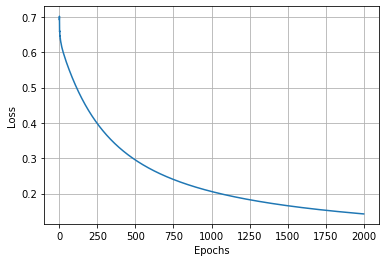

In [141]:
#plotting the loss
plt.figure()
plt.plot(losses)
plt.grid(True, which="both")
plt.xlabel('Epochs')
plt.ylabel('Loss')

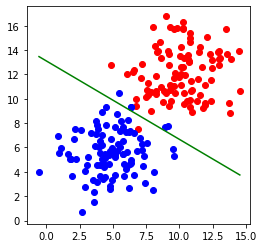

In [142]:
#getting the weights from the line_parameter matrix
w1 = line_parameters.item(0)
w2 = line_parameters.item(1)
b = line_parameters.item(2)

#defining points to draw the line
x1 = np.array([bottom_region[:,0].min(), top_region[:,0].max()])
#since, w1x1 + w2x2 + b = 0, hence we can calculate x2 from here
x2 = -b/w2 + (x1*(-w1/w2))

#plotting the regression line for points
_, ax = plt.subplots(figsize = (4, 4))
ax.scatter(top_region[:,0], top_region[:,1], color = 'r')
ax.scatter(bottom_region[:,0], bottom_region[:,1], color = 'b')
draw(x1, x2)
plt.show()

#### 2. Gradient Descent using MXNet utility autograd():

In [143]:
#we'll start by importing the required MXNet libraries
import mxnet as mx
from mxnet import nd, autograd

In [144]:
#Now we'll be redeclaring the line parameters as they have already been trained.
#However, this time we will be using MXNet's nd array instead of np arrays.
line_parameters = nd.zeros((3, 1))

In [145]:
#declaring a placeholder to hold the gradient
line_parameters.attach_grad()

In [146]:
#tweaking the sigmoid function for MXNet library
def sigmoid(score):
    return 1/(1+nd.exp(-score))

In [147]:
#tweaking the cost function for MXNet library
def calculate_error(line_parameters, points, y):
    m = points.shape[0]
    p = sigmoid(mx.nd.dot(points, line_parameters))
    cross_entropy = -1/m*(mx.nd.dot(nd.log(p).T,y) + mx.nd.dot(nd.log(1-p).T,(1-y)))
    return cross_entropy

In [148]:
#exectuting the training loop
epochs = 2000
learning_rate = 0.06
losses = []

for e in range(epochs):
    loss = 0
    with autograd.record():
        loss = calculate_error(line_parameters, nd.array(all_points), nd.array(y))
    loss.backward()
    line_parameters -= learning_rate * line_parameters.grad
    losses.append(loss[0].asscalar())
    if (e+1)%200 == 0:
        print("e:%s, loss:%s"%(e+1, loss[0].asscalar()))

e:200, loss:0.43057054
e:400, loss:0.32818693
e:600, loss:0.26959586
e:800, loss:0.23204184
e:1000, loss:0.20593162
e:1200, loss:0.18668368
e:1400, loss:0.17186613
e:1600, loss:0.16007546
e:1800, loss:0.15044652
e:2000, loss:0.14241746


Text(0, 0.5, 'Loss')

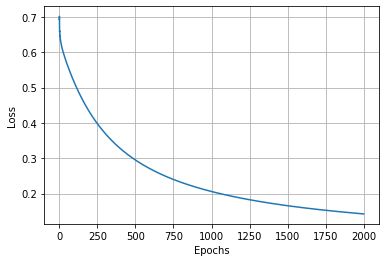

In [149]:
#plotting the loss
plt.figure()
plt.plot(losses)
plt.grid(True, which="both")
plt.xlabel('Epochs')
plt.ylabel('Loss')

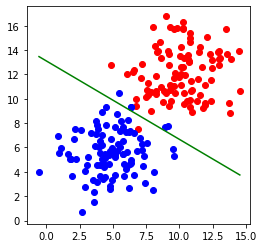

In [150]:
#getting the weights from the line_parameter matrix
w1 = line_parameters[0].asscalar()
w2 = line_parameters[1].asscalar()
b = line_parameters[2].asscalar()

#defining points to draw the line
x1 = nd.array([bottom_region[:,0].min(), top_region[:,0].max()])
#since, w1x1 + w2x2 + b = 0, hence we can calculate x2 from here
x2 = -b/w2 + (x1*(-w1/w2))

#plotting the regression line for points
_, ax = plt.subplots(figsize = (4, 4))
ax.scatter(top_region[:,0], top_region[:,1], color = 'r')
ax.scatter(bottom_region[:,0], bottom_region[:,1], color = 'b')
draw(x1.asnumpy(), x2.asnumpy())
plt.show()